<h1> Random Forest - Harris County Foreclosure Sale</h1>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [99]:
path1 = ("C:/Users/aath/Dropbox/MAEN/Thankful/Data/fls/FLS_Hist2017_clean.csv")
y2015 = pd.read_csv(path1)

In [100]:
y2015.head(2)

,rec_num,keymap,sold3rd,tax_id,org_loan_amt,mon_org_loan_date,year_org_loan_date,sale_date,est_loan_bal,mortgagee,bedr_num,prop_val,Term,Trustee,sq_ft,time_sold,trustee_ref_num,open_bid,final_bid,loan_type
0,0,NaN,1,NaN,NaN,NaN,NaN,4/4/2017,Not Applicable,Association,NaN,NaN,NaN,Sandy Dasigenis,NaN,1102.0,NaN,7277.0,7300.0,hoa
1,1,NaN,1,NaN,NaN,NaN,NaN,4/4/2017,Not Applicable,Association,NaN,NaN,NaN,Sandy Dasigenis,NaN,1106.0,NaN,6547.0,6550.0,hoa


In [101]:
# Check null status of the columns
y2015.isnull().sum()

rec_num                  0
keymap                1022
sold3rd                  0
tax_id                 439
org_loan_amt           361
mon_org_loan_date      277
year_org_loan_date     279
sale_date                0
est_loan_bal           857
mortgagee               28
bedr_num              1286
prop_val               506
Term                  1005
Trustee                  1
sq_ft                  614
time_sold             3591
trustee_ref_num       4762
open_bid              4359
final_bid             3605
loan_type               43
dtype: int64

In [102]:
y2015 = y2015[pd.notnull(y2015['Trustee'])]
y2015 = y2015[pd.notnull(y2015['mortgagee'])]
y2015 = y2015[pd.notnull(y2015['loan_type'])]


In [103]:
y2015=y2015.dropna(axis='columns')

In [104]:
# Check to see how many unique categories we may need to create
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

sale_date
4
mortgagee
854
Trustee
300
loan_type
10


In [105]:
y2015.head()

,rec_num,sold3rd,sale_date,mortgagee,Trustee,loan_type
0,0,1,4/4/2017,Association,Sandy Dasigenis,hoa
1,1,1,4/4/2017,Association,Sandy Dasigenis,hoa
2,2,1,4/4/2017,Association,Sandy Dasigenis,hoa
3,3,1,4/4/2017,Association,Sandy Dasigenis,hoa
4,4,0,4/4/2017,Bank Of New York,Sandy Dasigenis,conv


In [106]:
# We need to drop more columns so ensemble model does not crash 
y2015 = y2015.drop('rec_num', 1)
2015 = y2015.drop('sale_date', 1)

SyntaxError: can't assign to literal (<ipython-input-106-22fd05a146e3>, line 3)

In [113]:
import timeit

start = timeit.default_timer() # Capture start time of the script

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
start = timeit.default_timer()
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('sold3rd', 1)
Y = y2015['sold3rd']
X = pd.get_dummies(X)

cross_val_score(rfc, X, Y, cv=10) 


array([ 0.86534653,  0.8019802 ,  0.66138614,  0.58811881,  0.55952381,
        0.52777778,  0.70833333,  0.63690476,  0.78174603,  0.86083499])

In [114]:
stop = timeit.default_timer()
execution_time = stop - start

print ("Program Executed in  {} seconds".format(execution_time))

Program Executed in  13.3011669078478 seconds


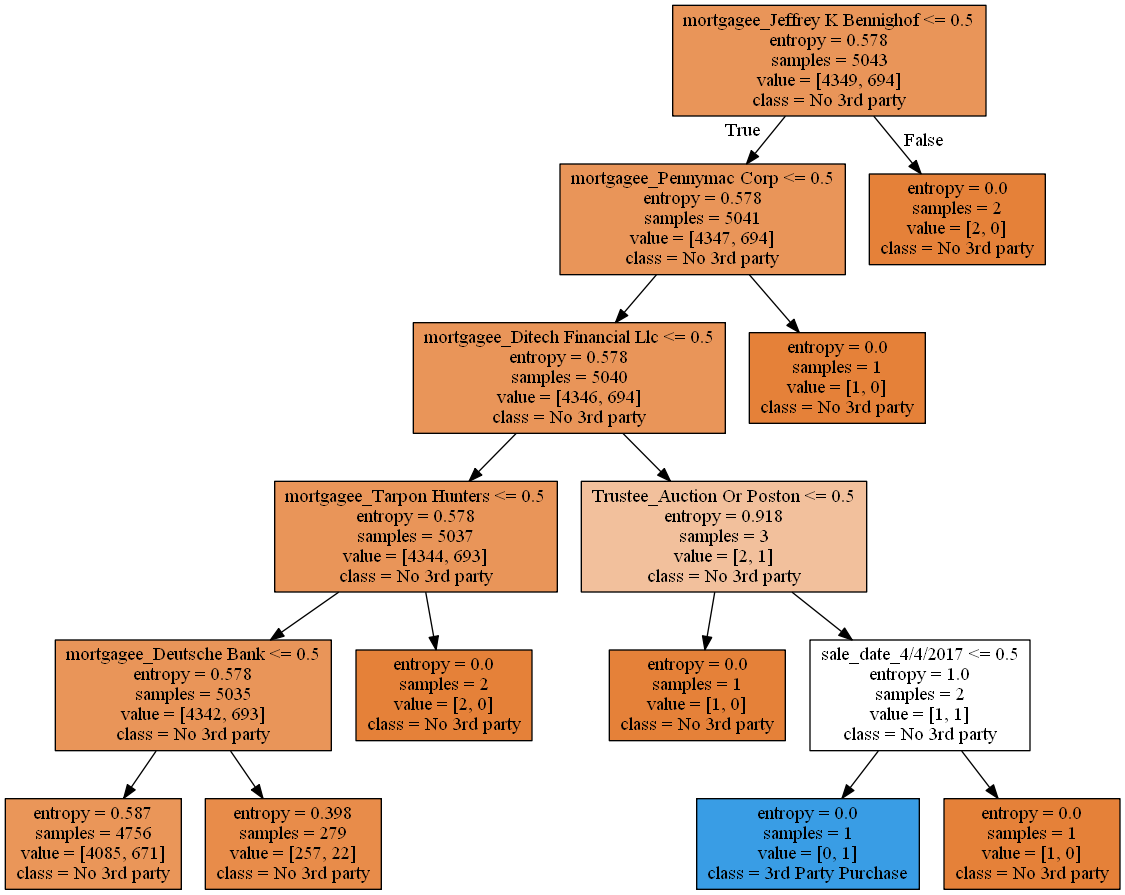

In [115]:
start = timeit.default_timer()

# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=5,
   # random_state = 1337
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['No 3rd party', '3rd Party Purchase'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [116]:
stop = timeit.default_timer()
execution_time = stop - start

print ("Program Executed in  {} seconds".format(execution_time))

Program Executed in  2.1963884356046037 seconds
